In [22]:
import glob
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import dataset
    data = pd.read_csv("../simulation_logs/2018_05_18_135051_loadh1_homing_simple.csv")

    # Get data Goal Reached
    X = data[data['event'].str.startswith('reached goal')]['goal_reached']

    # Get data Timestep2Goal
    Y = data[data['event'].str.startswith('reached goal')]['timestep_to_goal']

    plt.plot(X, Y)
    plt.xlim(xmin=1, xmax=25)
    #plt.ylim(ymin=0, ymax=5000)
    plt.xlabel('Goal Reached')
    plt.ylabel('Timesteps to goal')
    plt.title('Timesteps to goal over Goal reached')
    plt.grid(True)
    plt.show()

In [6]:
dir_name = "2018_05_24_141641_100sim_100000timesteps/"
X_list = []
Y_list = []
simple_means_list = []

# For each simulation file
for f in glob.glob(dir_name + "*.csv"):
    if os.stat(f).st_size == 0:
        print('empty file', f)
        continue
    
    data = pd.read_csv(f)
    
    # Get data Timestep
    X = data[data['event'].str.startswith('reached goal')]['goal_reached']
    
    # Get data Timestep to Goal
    Y = data[data['event'].str.startswith('reached goal')]['timestep_to_goal']
    
    X_list.append(X)
    Y_list.append(Y)
    

In [11]:
min_goal_reached = min([max(e) for e in X_list])
print('min_goal_reached',min_goal_reached)

max_goal_reached = max([max(e) for e in X_list])
print('max_goal_reached', max_goal_reached)

('min_goal_reached', 20)
('max_goal_reached', 153)


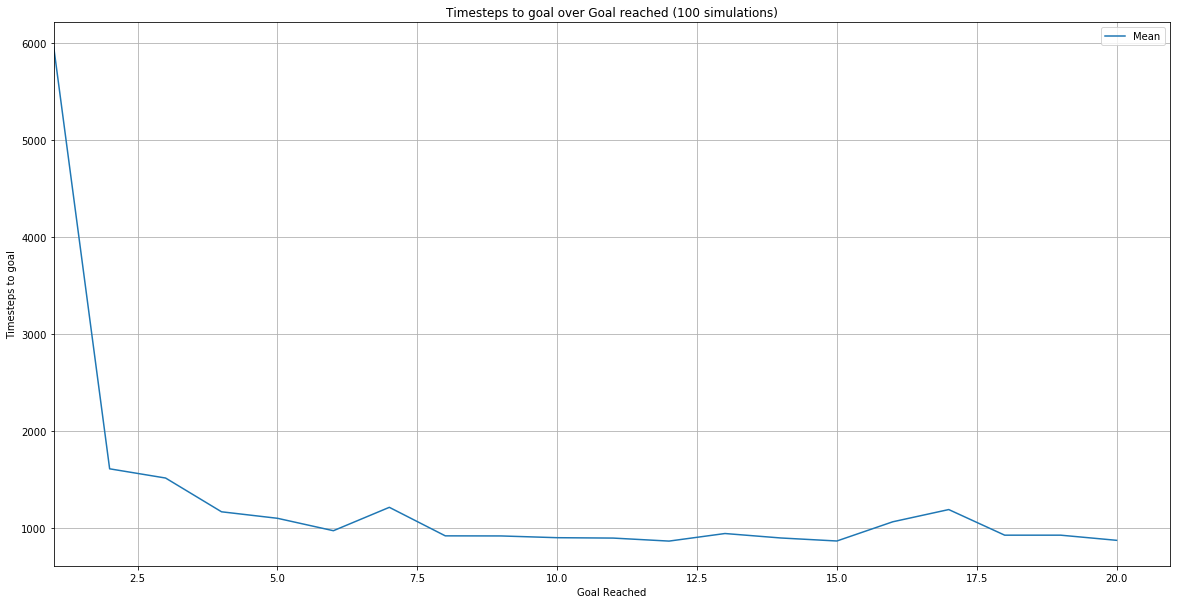

In [27]:
# Plot
Y_Final = [sum(e)/len(e) for e in zip(*Y_list)]
X_Final = range(1, 20 + 1)

# Get min and max
Y_min = [min(e) for e in zip(*Y_list)]
Y_max = [max(e) for e in zip(*Y_list)]

# Standard deviation
Y_std = [np.std(np.asarray(e)) for e in zip(*Y_list)]
Y_var = [np.var(np.asarray(e)) for e in zip(*Y_list)]

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(X_Final, Y_Final)

# ax.fill_between(X_Final, Y_min, Y_max, facecolor='yellow', alpha=0.1)
# ax.fill_between(X_Final, np.array(Y_Final) + np.array(Y_std), np.array(Y_Final) - np.array(Y_std), 
#                 facecolor='blue', alpha=0.3)

ax.set_xlim(xmin=1)
#ax.set_ylim(0, 7000)
ax.set_xlabel('Goal Reached')
ax.set_ylabel('Timesteps to goal')
ax.set_title('Timesteps to goal over Goal reached (100 simulations)')
ax.legend(['Mean'], loc='upper right')
ax.grid()
plt.show()

In [15]:
X_Final = range(1, 20)
X_Final

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [28]:
file = open("testfile.txt","w") 
 
file.write("Hello World") 
 
file.close() 